# Random forest

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

df = pd.read_csv("../../data/heart.csv", index_col=0)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


<Axes: xlabel='AHD', ylabel='count'>

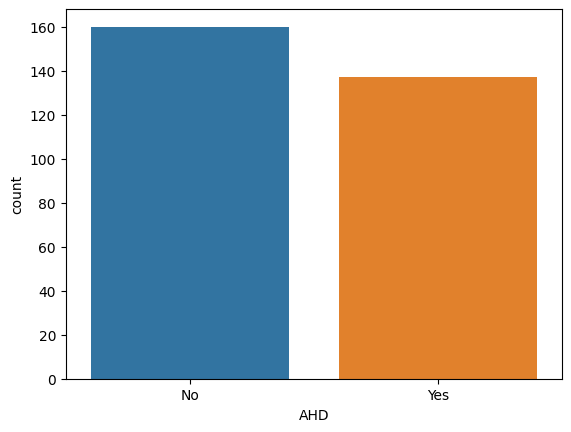

In [5]:
df.dropna(inplace=True)

sns.countplot(data=df, x="AHD", hue="AHD")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


## Random forest classifiers

In [8]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
1,63,1,145,233,1,2,150,0,2.3,3,0.0,False,False,True,False,False,False
2,67,1,160,286,0,2,108,1,1.5,2,3.0,False,False,False,True,False,True
3,67,1,120,229,0,2,129,1,2.6,2,2.0,False,False,False,False,True,True
4,37,1,130,250,0,0,187,0,3.5,3,0.0,True,False,False,True,False,False
5,41,0,130,204,0,2,172,0,1.4,1,0.0,False,True,False,True,False,False


In [9]:
from sklearn.model_selection import train_test_split

X, y = df_dummies.drop("AHD_Yes", axis=1), df_dummies["AHD_Yes"]
X_Train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_Train.shape, X_test.shape

((237, 16), (60, 16))

In [10]:
X_Train.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
278,39,0,138,220,0,0,152,0,0.0,2,0.0,True,False,False,True,False
263,60,0,150,240,0,0,171,0,0.9,1,0.0,False,False,True,True,False
31,69,0,140,239,0,0,151,0,1.8,1,2.0,False,False,True,True,False
23,58,1,120,284,0,2,160,0,1.8,2,0.0,False,True,False,True,False
282,47,1,130,253,0,0,179,0,0.0,1,0.0,True,False,False,True,False


In [12]:
y_train.head()

278    False
263    False
31     False
23      True
282    False
Name: AHD_Yes, dtype: bool

In [13]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_Train, y_train)

y_pred = model_rf.predict(X_test)

y_pred

array([False,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False,  True,  True,  True, False,  True, False,  True,
        True, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
        True, False,  True, False, False, False,  True, False, False,
        True,  True, False, False,  True,  True])

## Evaluation

              precision    recall  f1-score   support

       False       0.94      0.89      0.91        36
        True       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



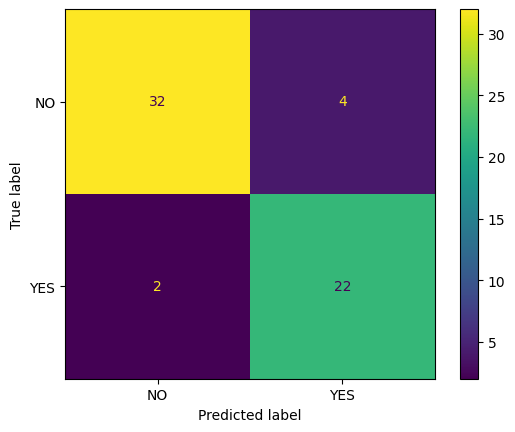

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["NO", "YES"]).plot()

In [17]:
model_rf.feature_importances_

array([0.08839598, 0.03404896, 0.08362822, 0.09486928, 0.01300379,
       0.02115667, 0.12223509, 0.05525256, 0.11696637, 0.03096116,
       0.14055381, 0.03680003, 0.00910466, 0.01581684, 0.07399679,
       0.06320981])

In [18]:
model_rf.feature_importances_.shape, X_Train.shape

((16,), (237, 16))

In [19]:
model_rf.feature_importances_.sum()

np.float64(0.9999999999999999)

In [20]:
feature_importance = pd.DataFrame([X.columns, model_rf.feature_importances_]).T
feature_importance.columns = ["Feature", "Importance"]
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
feature_importance

,Feature,Importance
10,Ca,0.140554
6,MaxHR,0.122235
8,Oldpeak,0.116966
3,Chol,0.094869
0,Age,0.088396
2,RestBP,0.083628
14,Thal_normal,0.073997
15,Thal_reversable,0.06321
7,ExAng,0.055253
11,ChestPain_nonanginal,0.0368


<Axes: xlabel='Importance', ylabel='Feature'>

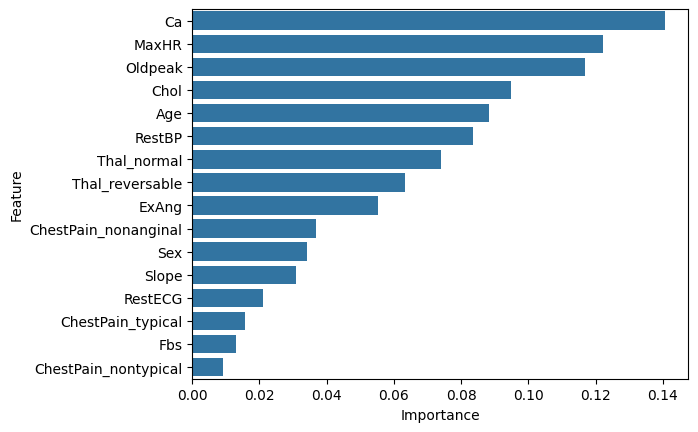

In [21]:
sns.barplot(data=feature_importance, x="Importance", y="Feature")